In [175]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data_function
import datetime
from matplotlib.dates import DateFormatter

# Text analysis
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist as fdist
import re

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#**Customer Purchase Data:**

In [176]:
Customer_data = pd.read_csv('/content/drive/MyDrive/Quantium Data Analytics/QVI_purchase_behaviour.csv')
Customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [177]:
Customer_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [178]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [179]:
Customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [180]:
Customer_data['LYLTY_CARD_NBR'].nunique()

72637

Different lifestages that exist:

In [181]:
Customer_data['LIFESTAGE'].nunique()

7

What are the unique Lifestages?

In [182]:
Customer_data['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [183]:
Customer_data['PREMIUM_CUSTOMER'].nunique()

3

In [184]:
Customer_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

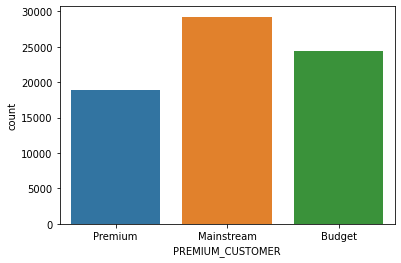

In [185]:
sns.countplot(Customer_data['PREMIUM_CUSTOMER'])
plt.show()


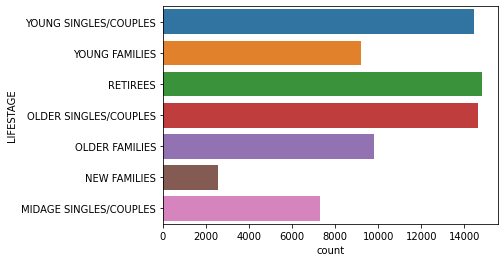

In [186]:
sns.countplot(y= Customer_data['LIFESTAGE'].sort_values(ascending = False))
plt.show()


# **Transactions Data**

In [187]:
Transactions_data = pd.read_csv('/content/drive/MyDrive/Quantium Data Analytics/QVI_transaction_data.xlsx - in - QVI_transaction_data.xlsx - in.csv')
Transactions_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17/10/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14/05/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20/05/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17/08/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18/08/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [188]:
Transactions_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [189]:
Transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [190]:
Transactions_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [191]:
list(Transactions_data.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

**Looking into the dates:**

In [192]:
Transactions_data['DATE'].head()

0    17/10/2018
1    14/05/2019
2    20/05/2019
3    17/08/2018
4    18/08/2018
Name: DATE, dtype: object

In [193]:
Transactions_data['DATE'].tail()

264831    09/03/2019
264832    13/08/2018
264833    06/11/2018
264834    27/12/2018
264835    22/09/2018
Name: DATE, dtype: object

**Product Names:**

In [194]:
Transactions_data['PROD_NAME'].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [195]:
Transactions_data['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [196]:
Transactions_data['PROD_NAME'].nunique()

114

In [197]:
Transactions_data['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

**Transactions ID:**

For checking in the transactions made over the years

In [198]:
Transactions_data['TXN_ID'].head()

0       1
1     348
2     383
3     974
4    1038
Name: TXN_ID, dtype: int64

In [199]:
Transactions_data['TXN_ID'].nunique()

263127

Showing up the transaction IDs that had repeated usage:

In [200]:
Transactions_data[Transactions_data.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
42,20/05/2019,55,55073,48887,113,Twisties Chicken270g,1,4.6
377,10/01/2019,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4
419,18/10/2018,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8
476,08/09/2018,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7
511,03/08/2018,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6


In [201]:
Transactions_data.loc[Transactions_data['TXN_ID'] == 48887]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
41,20/05/2019,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25
42,20/05/2019,55,55073,48887,113,Twisties Chicken270g,1,4.60


In [202]:
Transactions_data.loc[Transactions_data['TXN_ID'] == 7739]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
376,10/01/2019,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.8
377,10/01/2019,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.4


In [203]:
Transactions_data.loc[Transactions_data['TXN_ID'] == 10982]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
418,18/10/2018,12,12301,10982,50,Tostitos Lightly Salted 175g,2,8.8
419,18/10/2018,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.8


In [204]:
Transactions_data.loc[Transactions_data['TXN_ID'] == 14546]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
475,08/09/2018,16,16427,14546,99,Pringles Sthrn FriedChicken 134g,1,3.7
476,08/09/2018,16,16427,14546,81,Pringles Original Crisps 134g,1,3.7


In [205]:
Transactions_data.loc[Transactions_data['TXN_ID'] == 16682]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
17706,09/05/2019,19,19271,16682,93,Doritos Corn Chip Southern Chicken 150g,1,3.9


**Product Quantity:**

In [206]:
Transactions_data['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [207]:
Transactions_data['PROD_QTY'].value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

In [208]:
Transactions_data.loc[Transactions_data['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,19/08/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,20/05/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [209]:
Transactions_data.loc[Transactions_data['LYLTY_CARD_NBR'] ==226000 ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,19/08/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,20/05/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Dropping in the Cutomeer with LYLTY_CARD_NBR #26000 data shows the customer purhcase trend is in lumpsum which may conclude he/she buys for commercial purpose. 

In [210]:
Transactions_data.drop(Transactions_data.index[Transactions_data['LYLTY_CARD_NBR'] == 226000], inplace = True)
Customer_data.drop(Customer_data.index[Customer_data['LYLTY_CARD_NBR']== 226000], inplace = True)

**Date Issues:**

Lets check in to Transactions over time are valid without any obvious data issues.

In [211]:
Transactions_data['DATE'].nunique()

364

In [212]:
Transactions_data['DATE'].value_counts()

24/12/2018    939
23/12/2018    917
22/12/2018    915
19/12/2018    906
18/12/2018    862
             ... 
12/12/2018    664
24/06/2019    662
13/06/2019    659
18/10/2018    658
25/11/2018    648
Name: DATE, Length: 364, dtype: int64

Total Sales for each date.



In [213]:
total_sales = pd.pivot_table(Transactions_data, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
total_sales.head()

,TOT_SALES
DATE,
01/01/2019,5021.1
01/02/2019,5479.4
01/03/2019,5211.7
01/04/2019,4879.7
01/05/2019,5095.0


**Aquiring out the column Brand Name:**

In [214]:
Transactions_data['BRAND'] = Transactions_data['PROD_NAME'].str.split().str[0]
Transactions_data['BRAND'].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [215]:
Transactions_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,17/10/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,14/05/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,20/05/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,17/08/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,18/08/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


**Brands & Their Sales:**

In [216]:
Transactions_data.groupby('BRAND').TOT_SALES.sum().sort_values(ascending = False)

BRAND
Kettle        390239.8
Smiths        210076.8
Doritos       201538.9
Pringles      177655.5
Old            90785.1
Thins          88852.5
Twisties       81522.1
Tostitos       79789.6
Infuzions      76247.6
Cobs           70569.8
RRD            64954.5
Tyrrells       51647.4
Grain          43048.8
Cheezels       40029.9
Dorito         39052.0
WW             35889.5
Natural        34272.0
Red            30091.5
Infzns         22800.0
CCs            18078.9
Cheetos        16884.5
Smith          14583.4
Woolworths     13454.1
GrnWves         8568.4
NCC             8046.0
French          7929.0
Burger          6831.0
Snbts           5076.2
Sunbites        4600.2
Name: TOT_SALES, dtype: float64

In [217]:
total_sales_product_brand = pd.pivot_table(Transactions_data, values = 'TOT_SALES', index = ['BRAND', 'PROD_NAME'])
total_sales_product_brand.head(10)

TOT_SALES
BRAND    PROD_NAME                                        
Burger   Burger Rings 220g                        4.367647
CCs      CCs Nacho Cheese    175g                 3.979907
         CCs Original 175g                        3.994716
         CCs Tasty Cheese    175g                 3.943470
Cheetos  Cheetos Chs & Bacon Balls 190g           6.249696
         Cheetos Puffs 165g                       5.277072
Cheezels Cheezels Cheese 330g                    10.891362
         Cheezels Cheese Box 125g                 3.942916
Cobs     Cobs Popd Sea Salt  Chips 110g           7.305544
         Cobs Popd Sour Crm  &Chives Chips 110g   7.263185

In [218]:
total_sales_product_brand.tail(10)

TOT_SALES
BRAND      PROD_NAME                                        
WW         WW Crinkle Cut      Chicken 175g         3.205317
           WW Crinkle Cut      Original 175g        3.214326
           WW D/Style Chip     Sea Salt 200g        3.573656
           WW Original Corn    Chips 200g           3.590301
           WW Original Stacked Chips 160g           3.580229
           WW Sour Cream &OnionStacked Chips 160g   3.589885
           WW Supreme Cheese   Corn Chips 200g      3.572101
Woolworths Woolworths Cheese   Rings 190g           3.410026
           Woolworths Medium   Salsa 300g           2.832168
           Woolworths Mild     Salsa 300g           2.840040

Text(0.5, 0, 'Transaction')

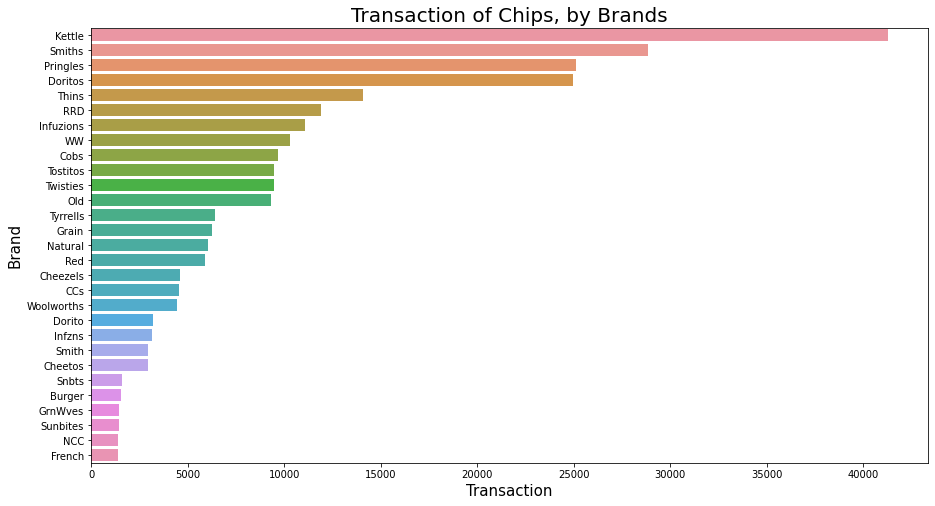

In [219]:
plt.figure(figsize=(15,8))
sns.barplot(x = Transactions_data["BRAND"].value_counts(),y=Transactions_data["BRAND"].value_counts().index)
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)

In [220]:
Transactions_data['PACK_SIZE'] = Transactions_data['PROD_NAME'].str.extract("(\d+)")
Transactions_data['PACK_SIZE'] = pd.to_numeric(Transactions_data['PACK_SIZE'])
Transactions_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,17/10/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,14/05/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,20/05/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,17/08/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,18/08/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [221]:
Transactions_data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

**Product Size:**

In [222]:
Packs = pd.pivot_table(Transactions_data, values = ['PACK_SIZE', 'TOT_SALES'], index = ['BRAND', 'PROD_NAME'])
Packs.head(15)

PACK_SIZE  TOT_SALES
BRAND    PROD_NAME                                                     
Burger   Burger Rings 220g                               220   4.367647
CCs      CCs Nacho Cheese    175g                        175   3.979907
         CCs Original 175g                               175   3.994716
         CCs Tasty Cheese    175g                        175   3.943470
Cheetos  Cheetos Chs & Bacon Balls 190g                  190   6.249696
         Cheetos Puffs 165g                              165   5.277072
Cheezels Cheezels Cheese 330g                            330  10.891362
         Cheezels Cheese Box 125g                        125   3.942916
Cobs     Cobs Popd Sea Salt  Chips 110g                  110   7.305544
         Cobs Popd Sour Crm  &Chives Chips 110g          110   7.263185
         Cobs Popd Swt/Chlli &Sr/Cream Chips 110g        110   7.272193
Dorito   Dorito Corn Chp     Supreme 380g                380  12.268929
Doritos  Doritos Cheese      Supreme 330g                330  10.940564
         Doritos Corn Chip Mexican Jalapeno 150g         150   7.455524
         Doritos Corn Chip Southern Chicken 150g         150   7.482787

Pack Size distribution:

Text(0.5, 1.0, 'Pack Size distribution')

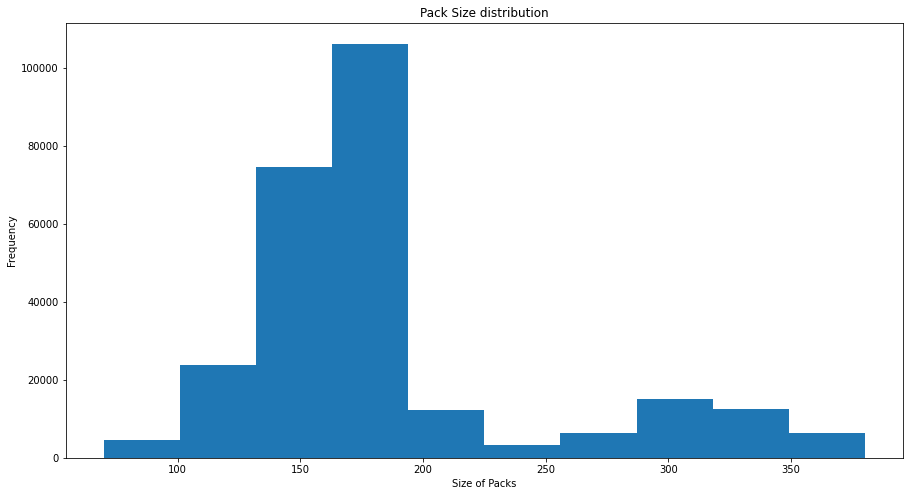

In [223]:
plt.figure(figsize=(15,8))
plt.hist(Transactions_data['PACK_SIZE'])
plt.xlabel('Size of Packs')
plt.ylabel('Frequency')
plt.title('Pack Size distribution')

# **Combined Data:**

In [224]:
QVI_data = pd.merge(Customer_data , Transactions_data)
QVI_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150
2,1003,YOUNG FAMILIES,Budget,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210
3,1003,YOUNG FAMILIES,Budget,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160


In [225]:
QVI_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   LIFESTAGE         264834 non-null  object 
 2   PREMIUM_CUSTOMER  264834 non-null  object 
 3   DATE              264834 non-null  object 
 4   STORE_NBR         264834 non-null  int64  
 5   TXN_ID            264834 non-null  int64  
 6   PROD_NBR          264834 non-null  int64  
 7   PROD_NAME         264834 non-null  object 
 8   PROD_QTY          264834 non-null  int64  
 9   TOT_SALES         264834 non-null  float64
 10  BRAND             264834 non-null  object 
 11  PACK_SIZE         264834 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 26.3+ MB


In [226]:
QVI_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BRAND               0
PACK_SIZE           0
dtype: int64

In [227]:
QVI_data.nunique()

LYLTY_CARD_NBR       72636
LIFESTAGE                7
PREMIUM_CUSTOMER         3
DATE                   364
STORE_NBR              272
TXN_ID              263125
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 5
TOT_SALES              111
BRAND                   29
PACK_SIZE               21
dtype: int64

In [228]:
QVI_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [229]:
QVI_data.to_csv('Combined_customer_transaction_data.csv')

# **Customer Segment Data-Analysis:**

Now that the data is processed and cleaned we would looking into defining a few metrics such as:




*   Which segment spends the most on chips by lifestage and Permium purchasing behaviour.
*   How many customers are in the different segment.

*   How many chips are bought per customer by segment.

*   What is the average chip price by customer segment.







In [230]:
QVI_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150
2,1003,YOUNG FAMILIES,Budget,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210
3,1003,YOUNG FAMILIES,Budget,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160


In [231]:
sales = pd.DataFrame(QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales' , ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            168363.25
Mainstream       YOUNG SINGLES/COUPLES     157621.60
                 RETIREES                  155677.05
Budget           YOUNG FAMILIES            139345.85
                 OLDER SINGLES/COUPLES     136769.80
Mainstream       OLDER SINGLES/COUPLES     133393.80
Premium          OLDER SINGLES/COUPLES     132263.15
Budget           RETIREES                  113147.80
Mainstream       OLDER FAMILIES            103445.55
Premium          RETIREES                   97646.05
Mainstream       YOUNG FAMILIES             92788.75
                 MIDAGE SINGLES/COUPLES     90803.85
Premium          YOUNG FAMILIES             84025.50
                 OLDER FAMILIES             80658.40
Budget           YOUNG SINGLES/COUPLES      61141.60
Premium          MIDAGE SINGLES/COUPLES     58432.65
                 YOUNG SINGLES/COUPLES      41642.10
Budget           MIDAGE SINGLES/COUPLES     35514.80
                 NEW FAMILIES               21928.45
Mainstream       NEW FAMILIES               17013.90
Premium          NEW FAMILIES               11491.10

Visual Representation of the Total Sales by Customer Segments:

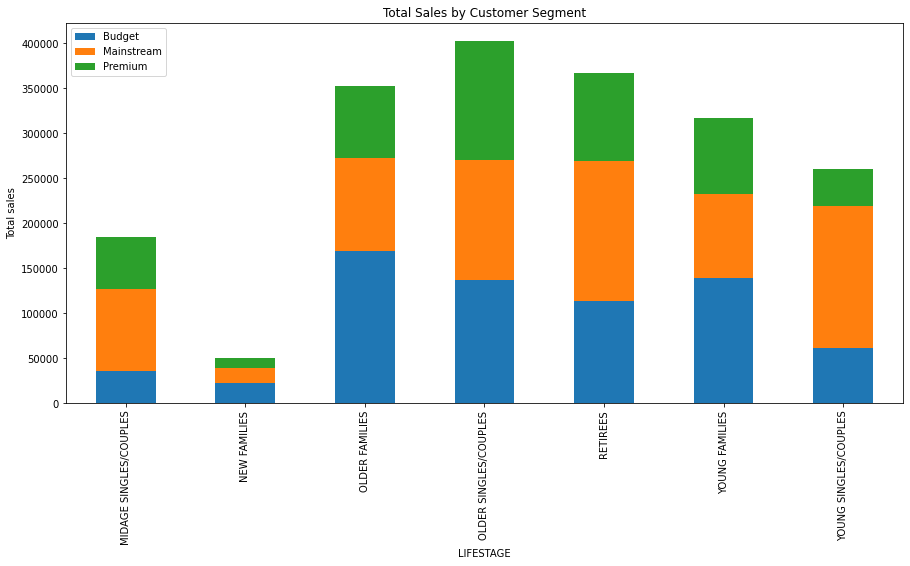

In [232]:
sales = pd.DataFrame(QVI_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
sales.unstack().plot(kind = 'bar', stacked = True, figsize = (15,7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [233]:
customers = pd.DataFrame(QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers' , ascending = False, inplace = True)
customers

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                  
Mainstream       YOUNG SINGLES/COUPLES                  8088
                 RETIREES                               6479
                 OLDER SINGLES/COUPLES                  4930
Budget           OLDER SINGLES/COUPLES                  4929
Premium          OLDER SINGLES/COUPLES                  4750
Budget           OLDER FAMILIES                         4675
                 RETIREES                               4454
                 YOUNG FAMILIES                         4017
Premium          RETIREES                               3872
Budget           YOUNG SINGLES/COUPLES                  3779
Mainstream       MIDAGE SINGLES/COUPLES                 3340
                 OLDER FAMILIES                         2831
                 YOUNG FAMILIES                         2728
Premium          YOUNG SINGLES/COUPLES                  2574
                 YOUNG FAMILIES                         2433
                 MIDAGE SINGLES/COUPLES                 2431
                 OLDER FAMILIES                         2273
Budget           MIDAGE SINGLES/COUPLES                 1504
                 NEW FAMILIES                           1112
Mainstream       NEW FAMILIES                            849
Premium          NEW FAMILIES                            588

Visual Representation of Number of customer by segment:

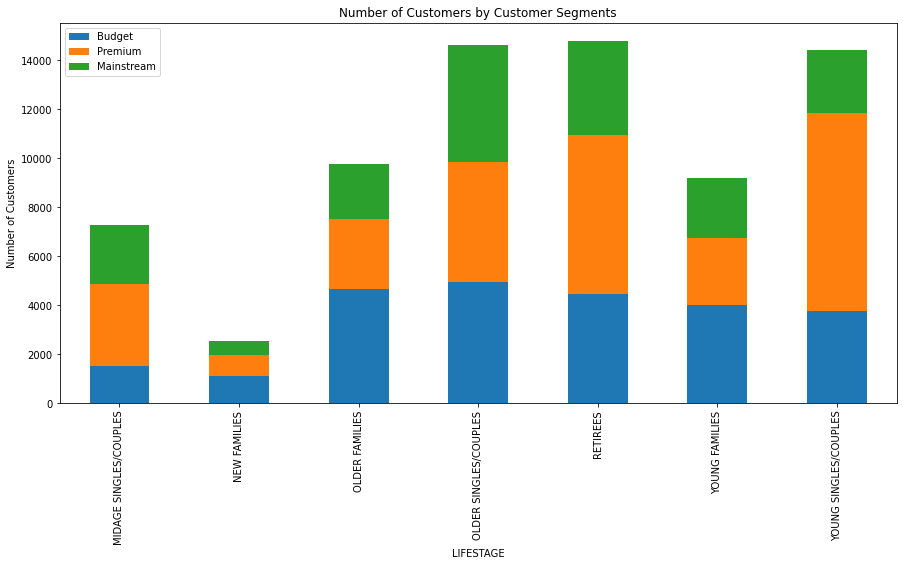

In [234]:
customers = pd.DataFrame(QVI_data.groupby([ 'LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customers.unstack().plot(kind = 'bar', stacked = True, figsize = (15,7), title = 'Number of Customers by Customer Segments')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Premium', 'Mainstream'], loc = 2)

It shows that young couples contribute more to the sales of Chips..

In [235]:
Average_units =  QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
Average_units = pd.DataFrame(Average_units, columns = {'Average unit per customer'})
Average_units.sort_values(by= 'Average unit per customer', ascending = False).head()

,,Average unit per customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.804309
Budget,OLDER FAMILIES,9.639572
Premium,OLDER FAMILIES,9.578091
Budget,YOUNG FAMILIES,9.238486
Premium,YOUNG FAMILIES,9.209207


Visualization of Average unit per customer:

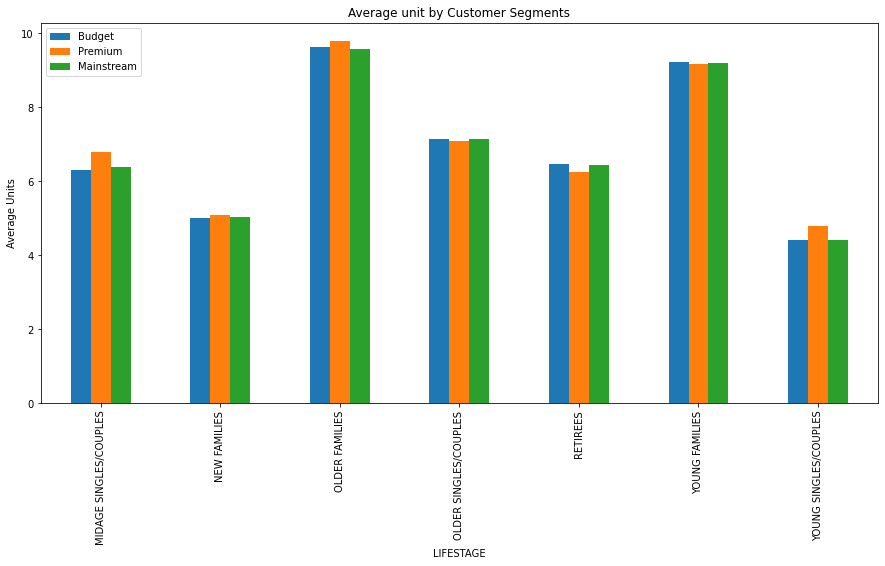

In [236]:
Average_units =  QVI_data.groupby([ 'LIFESTAGE', 'PREMIUM_CUSTOMER',]).PROD_QTY.sum() / QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
Average_units.unstack().plot(kind = 'bar', figsize = (15,7), title = 'Average unit by Customer Segments')
plt.ylabel('Average Units')
plt.legend(['Budget', 'Premium', 'Mainstream'], loc = 2)

We see a trend  Older and Young Families have a trend purchasing more chips:

In [237]:
Average_price = QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
Average_price = pd.DataFrame(Average_price, columns = {'Price Per unit'})
Average_price.sort_values(by= 'Price Per unit', ascending = False).head(10)


Price Per unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.080079
                 MIDAGE SINGLES/COUPLES        4.000346
                 NEW FAMILIES                  3.939315
Budget           NEW FAMILIES                  3.936178
                 RETIREES                      3.933660
Premium          RETIREES                      3.924050
                 OLDER SINGLES/COUPLES         3.891695
                 NEW FAMILIES                  3.886067
Budget           OLDER SINGLES/COUPLES         3.883299
Mainstream       RETIREES                      3.842170

Visually Representing the data:

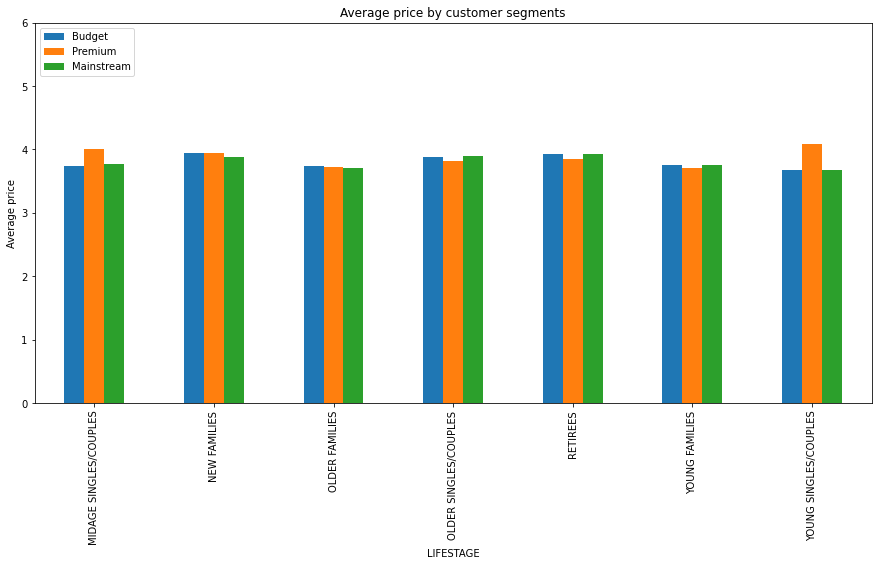

In [238]:
Average_price = QVI_data.groupby([ 'LIFESTAGE', 'PREMIUM_CUSTOMER',]).TOT_SALES.sum() / QVI_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
Average_price.unstack().plot(kind = 'bar', figsize = (15,7), title = 'Average price by customer segments', ylim= (0,6))
plt.ylabel('Average price')
plt.legend(['Budget', 'Premium', 'Mainstream'], loc = 2)

# Deep-dive:

Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

Adding in a Price Column:

In [239]:
Price_per_unit = QVI_data
Price_per_unit['Price'] = Price_per_unit['TOT_SALES']/Price_per_unit['PROD_QTY']
Price_per_unit.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE,Price
0,1000,YOUNG SINGLES/COUPLES,Premium,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175,3.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,Red,150,2.7
2,1003,YOUNG FAMILIES,Budget,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,Grain,210,3.6
3,1003,YOUNG FAMILIES,Budget,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural,175,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,WW,160,1.9


While performing the analysis an issue was ommited which is rectified below!

Text(0.5, 1.0, 'Pricing distribution')

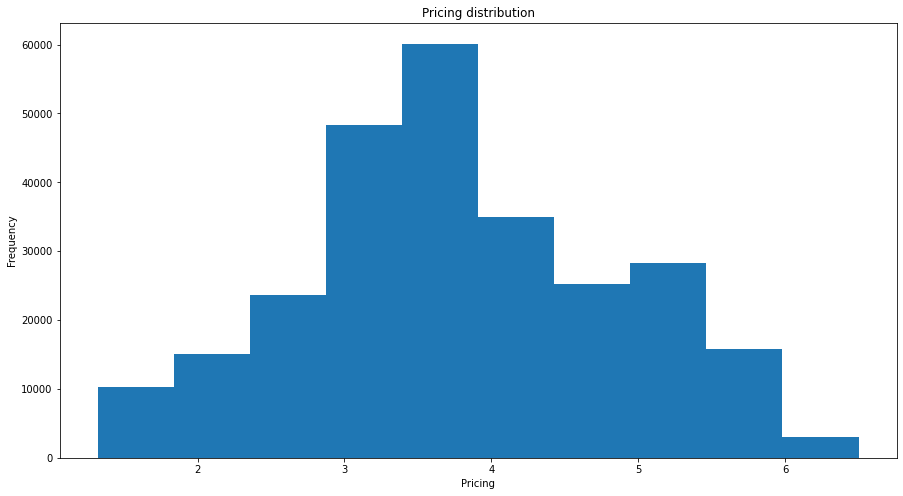

In [240]:
plt.figure(figsize=(15,8))
plt.hist(Price_per_unit['Price'])
plt.xlabel('Pricing')
plt.ylabel('Frequency')
plt.title('Pricing distribution')

On checking in the product pricing distribution it is seen that there are many products tagged between 3.5 to 4.

(0.0, 395.5)

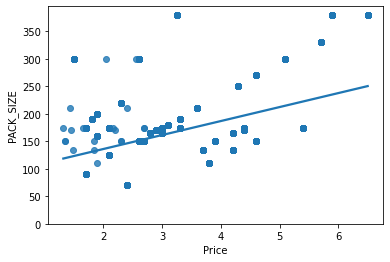

In [241]:
sns.regplot(x= 'Price', y = 'PACK_SIZE', data = Price_per_unit)
plt.ylim(0,)

On plotting the Regplot we see their is a positive correlation between Price and the Pack-Size as the prices rise so does the quantity of the chips.

# **Conclusion:**



*   The purchasing trend has been seen more in the Older and Young families.

*   On checking in the with the customer segments the numbers were higher among the OLDER SINGLES/COUPLES and RETIREES
*   Sales in the segment were higher among the OLDER SINGLES/COUPLES and RETIREES


*   There has been observed a positive correlation between the prices and pack size

